In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


In [2]:
#Find source for eligible drivers by state
state_income = 'EV_per_state_count.csv'
state_ev_count = 'median_income.csv'

state_income_df = pd.read_csv(state_income)
state_ev_count_df = pd.read_csv(state_ev_count)

income_count = pd.merge(state_income_df, state_ev_count_df, on='State')
income_count.head()

,State,2016,2017,2018,2019,2020,Total,HouseholdIncome (Median)
0,California,"73,854","94,873","153,442","148,710","146,951",617830,78672
1,New York,"6,043","10,090","15,752","15,266","15,086",62237,71117
2,Florida,"6,255","6,573","13,705","13,282","13,125",52940,57703
3,Washington,"5,363","7,068","12,650","12,260","12,115",49456,77006
4,Texas,"4,510","5,419","11,764","11,401","11,266",44360,63826


In [3]:
income_count2 = income_count[['State', 'Total', 'HouseholdIncome (Median)']]
income_count2.head(50)

,State,Total,HouseholdIncome (Median)
0,California,617830,78672
1,New York,62237,71117
2,Florida,52940,57703
3,Washington,49456,77006
4,Texas,44360,63826
5,New Jersey,36028,85245
6,Massachusetts,33850,84385
7,Illinois,28033,68428
8,Colorado,27505,75231
9,Arizona,25980,61529


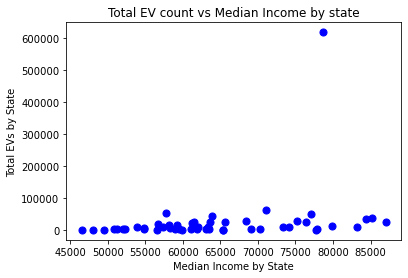

In [4]:
x_axis = income_count2['HouseholdIncome (Median)']
y_axis = income_count2['Total']
plt.scatter(x_axis,y_axis, color = 'blue', s = 50)
plt.xlabel('Median Income by State')
plt.ylabel('Total EVs by State')
plt.title('Total EV count vs Median Income by state')
plt.show()

The correlation between both factors is 0.26


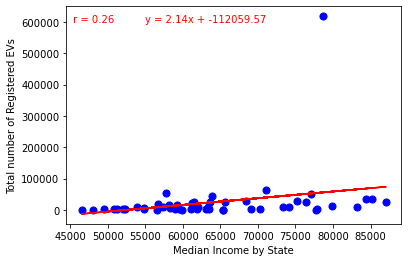

In [13]:
correlation = st.pearsonr(x_axis,y_axis)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis, color = 'blue', s = 50)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(55000,600000),fontsize=10,color="red")
plt.annotate(f" r = {round(correlation[0],2)}",(45000,600000),fontsize=10,color="red")
plt.xlabel('Median Income by State')
plt.ylabel('Total number of Registered EVs')

print(f"The correlation between both factors is {round(correlation[0],2)}")

In [15]:
#Removing the outlier of California
income_count3  = income_count2[income_count2['State'] != 'California']
income_count3

,State,Total,HouseholdIncome (Median)
1,New York,62237,71117
2,Florida,52940,57703
3,Washington,49456,77006
4,Texas,44360,63826
5,New Jersey,36028,85245
6,Massachusetts,33850,84385
7,Illinois,28033,68428
8,Colorado,27505,75231
9,Arizona,25980,61529
10,Oregon,24965,65667


The correlation between both factors is 0.4


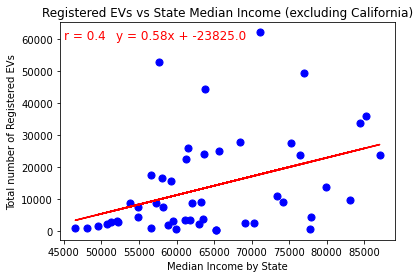

In [22]:
x_axis3 = income_count3['HouseholdIncome (Median)']
y_axis3 = income_count3['Total']
correlation2 = st.pearsonr(x_axis3,y_axis3)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis3,y_axis3)
regress_values = x_axis3 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis3,y_axis3, color = 'blue', s = 50)
plt.plot(x_axis3,regress_values,"r-")
plt.annotate(line_eq,(52000,60000),fontsize=12,color="red")
plt.annotate(f"r = {round(correlation2[0],2)}",(45000,60000),fontsize=12,color="red")
plt.xlabel('Median Income by State')
plt.ylabel('Total number of Registered EVs')
plt.title('Registered EVs vs State Median Income (excluding California)')
print(f"The correlation between both factors is {round(correlation2[0],2)}")